In [2]:
%config Completer.use_jedi = False       #without this line, autocomplete seemed to not be working, so I am putting it here. source: https://stackoverflow.com/questions/40536560/ipython-and-jupyter-autocomplete-not-working

import yfinance as yf
import pandas as pd

## Helper Functions 
Some functions to print output in a clearer way

In [3]:
def print_info(yf_tickers):
    if isinstance(yf_tickers,yf.Ticker):
        print(f"\n{'='*80}")
        space = ' '
        print(f"{space*33}{yf_tickers.info['symbol']}\n")
        for key in yf_tickers.info:
            print(f"--> {key:>29} : {yf_tickers.info[key]}")
            
    elif isinstance(yf_tickers,yf.Tickers):
        for ticker in yf_tickers.tickers:
            print(f"\n{'='*80}")
            space = ' '
            print(f"{space*33}{ticker.info['symbol']}\n")
            for key in ticker.info.keys():
                print(f"--> {key:>29} : {ticker.info[key]}")
                
def print_table(yf_tickers):
    if isinstance(yf_tickers,yf.Ticker):
        ticker = yf_tickers
        print(f"| {ticker.info.get('symbol','NONE'):<5} | {ticker.info.get('sector','NONE'):>25} | " + \
              f"{ticker.info.get('currency','NONE'):>4} | {ticker.info.get('quoteType','NONE'):>6} | " + \
              f"{ticker.info.get('shortName','NONE'):<35} |")

    elif isinstance(yf_tickers,yf.Tickers):
        for ticker in yf_tickers.tickers:
            print(f"| {ticker.info.get('symbol','NONE'):<5} | {ticker.info.get('sector','NONE'):>25} | " + \
                  f"{ticker.info.get('currency','NONE'):>4} | {ticker.info.get('quoteType','NONE'):>6} | " + \
                  f"{ticker.info.get('shortName','NONE'):<35} |")

## Ticker Object 
Use yf.Ticker to access information about a particular stock

In [3]:
ticker = yf.Ticker('AAPL')

In [95]:
print_info(ticker)


                                 AAPL

-->                           zip : 95014
-->                        sector : Technology
-->             fullTimeEmployees : 147000
-->           longBusinessSummary : Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store, that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcad

In [97]:
ticker.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2020-02-07    0.192500
2020-05-08    0.205000
2020-08-07    0.205000
2020-11-06    0.205000
2021-02-05    0.205000
Name: Dividends, Length: 70, dtype: float64

In [99]:
ticker.option_chain()

Options(calls=          contractSymbol       lastTradeDate  strike  lastPrice    bid    ask  \
0    AAPL210319C00030000 2021-03-16 13:47:33    30.0      96.19  95.40  95.55   
1    AAPL210319C00035000 2021-02-26 16:16:05    35.0      88.25  90.50  90.65   
2    AAPL210319C00040000 2021-02-24 15:32:38    40.0      84.16  85.45  85.55   
3    AAPL210319C00045000 2021-03-08 15:07:48    45.0      73.89  80.40  80.60   
4    AAPL210319C00047500 2021-03-08 14:30:07    47.5      74.10  77.95  78.05   
..                   ...                 ...     ...        ...    ...    ...   
162  AAPL210319C00720000 2020-08-28 18:27:44   720.0      13.70  13.15  13.75   
163  AAPL210319C00740000 2020-08-28 18:50:55   740.0      12.35  11.80  12.40   
164  AAPL210319C00800000 2020-08-28 19:54:57   800.0       9.05   8.85   9.40   
165  AAPL210319C00900000 2020-08-28 15:15:02   900.0       6.80   6.15   6.65   
166  AAPL210319C01000000 2020-08-28 19:41:40  1000.0       5.00   4.85   5.15   

       change

---
## Multiple Tickers
Use yf.Tickers for a list of stock symbols

In [3]:
list_tickers=['abbv','aapl','nrz','msft','jnj','voo']
tickers = yf.Tickers(list_tickers)

In [111]:
df = tickers.download(period='max', group_by='ticker')

[*********************100%***********************]  6 of 6 completed


In [114]:
df['VOO']

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-03-10,358.299988,359.839996,356.880005,358.070007,7187200.0,0.0,0.0
2021-03-11,360.660004,363.760010,360.160004,361.850006,3336400.0,0.0,0.0
2021-03-12,360.500000,362.450012,359.670013,362.359985,4846100.0,0.0,0.0


In [115]:
print_table(tickers)

| ABBV  |                Healthcare |  USD | EQUITY | AbbVie Inc.                         |
| AAPL  |                Technology |  USD | EQUITY | Apple Inc.                          |
| NRZ   |               Real Estate |  USD | EQUITY | New Residential Investment Corp     |
| MSFT  |                Technology |  USD | EQUITY | Microsoft Corporation               |
| JNJ   |                Healthcare |  USD | EQUITY | Johnson & Johnson                   |
| VOO   |                      NONE |  USD |    ETF | Vanguard S&P 500 ETF                |


---
## Multiple Tickers - Only Market Data
If you only want historical market data directly, use yf.download()

In [4]:
# Some extra imports for this part:
import datetime
from bs4 import BeautifulSoup as bs
import requests

In [5]:
def get_snp500_tickers_from_wiki():
    "returns list of tuples to add to my sql. IT downloads and parses list of S&P 500 companies from Wikipedia"
    now = datetime.datetime.utcnow()
    
    response = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    
    soup = bs(response.text)
    
    symbol_list = soup.select('table')[0].select('tr')[1:]
    
    symbols = []
    for i, symbol in enumerate(symbol_list):
        tds = symbol.select('td')
        symbols.append(tds[0].select('a')[0].text)   #this adds just the ticker
        
        #uncomment the section below and comment out the append above if you want to 
        #return a tuple with more information. 
#         symbols.append(
#             (
#                 tds[0].select('a')[0].text,  #ticker
#                 'stock',
#                 tds[1].select('a')[0].text,  #name
#                 tds[3].text,   #sector
#                 'USD', now, now
#             )
#         )
    
    return symbols

In [6]:
symbols = get_snp500_tickers_from_wiki()
symbols = symbols[:len(symbols)//2]
symbols

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'COP',
 'ED'

In [7]:
df = yf.download(symbols,group_by='ticker')

[*********************100%***********************]  252 of 252 completed

2 Failed downloads:
- BF.B: 1d data not available for startTime=-2208988800 and endTime=1616024580. Only 100 years worth of day granularity data are allowed to be fetched per request.
- BRK.B: No data found, symbol may be delisted


In [9]:
df['AAPL']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-03-11,122.540001,123.209999,121.260002,121.959999,121.959999,102753600.0
2021-03-12,120.400002,121.169998,119.160004,121.029999,121.029999,87963400.0
2021-03-15,121.410004,124.000000,120.419998,123.989998,123.989998,92403800.0


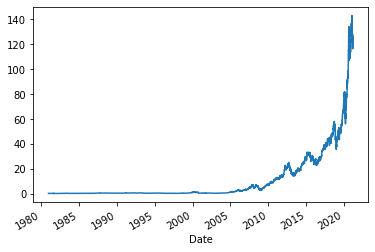

In [11]:
df['AAPL']['Close'].plot()